In [1]:
# -*- coding: utf-8 -*-

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from stingray.pulse.search import plot_profile
from stingray.pulse.pulsar import fold_events
from scipy import interpolate

/usr/local/anaconda3/lib/python3.8/site-packages/stingray/crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [2]:
expIDlist=["./P0201012149/P020101214906-20200323-02-01"]

In [3]:
Freqs=["0.00352714957,0.00"]

/usr/local/anaconda3/lib/python3.8/site-packages/stingray/utils.py:118: UserWarning: SIMON says: For exposure != 1, the uncertainty might be incorrect
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


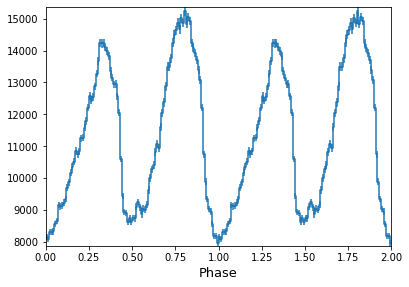

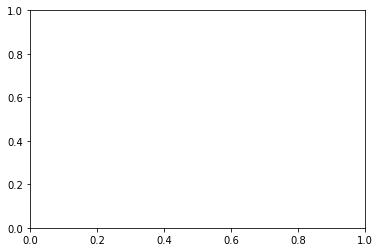

In [12]:
for i,expID in enumerate(expIDlist):
    freq = [float(item) for item in Freqs[i].split(',')]
    time_ref= 56.7
    time_col='TDB'
    
    file="./%s/hescreen_all.fits"%(expID)
    hdulist=fits.open(file)
    PI = hdulist[1].data['PI']
    time_obs = hdulist[1].data['time']
    time = hdulist[1].data[time_col]
    gti = np.array(fits.open(file)[2].data.tolist())
    Tobs2Tpulsar = interpolate.interp1d(time_obs, time, fill_value='extrapolate', kind='linear')
    Tpulsar2Tobs = interpolate.interp1d(time, time_obs, fill_value='extrapolate', kind='linear')
    gti = Tobs2Tpulsar(gti)
    time = time - time_ref
    gti = gti - time_ref
    mk = (PI > 7) & (PI < 44) #HE
    plt.subplots_adjust(top=0.95, bottom=0.12, left=0.15, right=0.95, hspace=0.01)
    phase_bins, profile, profile_err = fold_events(time[mk], *freq, nbin=100, gtis=gti, expocorr=True)
    plt.errorbar(np.hstack([phase_bins, phase_bins + 1]), np.hstack([profile, profile]), xerr=1 / 200., yerr=np.hstack([profile_err, profile_err]), drawstyle='steps-mid')
    plt.xlim(0, 2)
    plt.xlabel("Phase", fontsize=13)

    plt.ylim([(profile - profile_err).min(), (profile.max() + profile_err).max()])
    plt.savefig("pulse/pluse_%s.eps"%(i))
    plt.show()
    plt.cla()
    
    

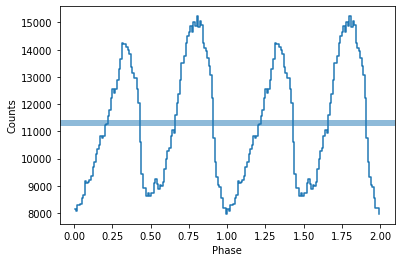

In [13]:
_ = plot_profile(phase_bins, profile)

In [14]:
print(np.array(phase_bins))

[0.005 0.015 0.025 0.035 0.045 0.055 0.065 0.075 0.085 0.095 0.105 0.115
 0.125 0.135 0.145 0.155 0.165 0.175 0.185 0.195 0.205 0.215 0.225 0.235
 0.245 0.255 0.265 0.275 0.285 0.295 0.305 0.315 0.325 0.335 0.345 0.355
 0.365 0.375 0.385 0.395 0.405 0.415 0.425 0.435 0.445 0.455 0.465 0.475
 0.485 0.495 0.505 0.515 0.525 0.535 0.545 0.555 0.565 0.575 0.585 0.595
 0.605 0.615 0.625 0.635 0.645 0.655 0.665 0.675 0.685 0.695 0.705 0.715
 0.725 0.735 0.745 0.755 0.765 0.775 0.785 0.795 0.805 0.815 0.825 0.835
 0.845 0.855 0.865 0.875 0.885 0.895 0.905 0.915 0.925 0.935 0.945 0.955
 0.965 0.975 0.985 0.995]


In [15]:
print(sum(profile))

1130170.315452834


In [16]:
print(profile/sum(profile))

[0.00720094 0.00714128 0.00735262 0.00734554 0.00736273 0.00756599
 0.007657   0.00810194 0.00805745 0.00808171 0.00816464 0.00826576
 0.00857722 0.00872384 0.00899081 0.00915766 0.00929519 0.00959653
 0.00951058 0.00959147 0.00994641 0.00996866 0.01024574 0.01043383
 0.01080292 0.01111843 0.01099506 0.01109416 0.01139348 0.01175044
 0.01208617 0.01259583 0.01258571 0.01258875 0.01247549 0.01237639
 0.01223771 0.01182477 0.01163541 0.01145226 0.01145933 0.01111602
 0.01066565 0.00937292 0.00833591 0.00788996 0.00788111 0.00761921
 0.00772538 0.00762233 0.00774194 0.00772475 0.00805239 0.00818324
 0.00802829 0.00784543 0.007987   0.00796694 0.00810025 0.00851081
 0.00884468 0.00909008 0.00920215 0.0095726  0.00978424 0.00967925
 0.01026819 0.01065185 0.01095481 0.01140076 0.01194439 0.01194168
 0.01217634 0.01260223 0.0128311  0.01295734 0.01315672 0.01297484
 0.01327941 0.0131611  0.01347559 0.01311863 0.01331278 0.01320661
 0.01259987 0.01245425 0.0123319  0.01212763 0.01185156 0.0115